In [94]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def upspace(eps1,eps2,mu1,mu2, mux, muy, muz):
    mu = np.sqrt(mux**2+muy**2+muz**2)
    lam = 200
    P_up= np.zeros(lam+1)
    k0 = 10*np.pi/lam
    for z0 in range(lam+1):
        i1 = lambda s: s*(-s**2 + 1)**(-0.5)*abs((eps1**0.5*k0*mu2*(-s**2 + 1)**0.5 - eps2**0.5*k0*mu1*(-eps1*(-(-s**2 + 1)**1.0 + 1)/eps2 + 1)**0.5)/(eps1**0.5*k0*mu2*(-s**2 + 1)**0.5 + eps2**0.5*k0*mu1*(-eps1*(-(-s**2 + 1)**1.0 + 1)/eps2 + 1)**0.5))**2 + s*(-s**2 + 1)**0.5*abs((eps1**0.5*eps2*k0*(-s**2 + 1)**0.5 - eps1*eps2**0.5*k0*(-eps1*(-(-s**2 + 1)**1.0 + 1)/eps2 + 1)**0.5)/(eps1**0.5*eps2*k0*(-s**2 + 1)**0.5 + eps1*eps2**0.5*k0*(-eps1*(-(-s**2 + 1)**1.0 + 1)/eps2 + 1)**0.5))**2
        I1 = integrate.quad(i1, 0, 1)[0]
        i2 = lambda s:np.real((-s*(-s**2 + 1)**(-0.5)*(eps1**0.5*k0*mu2*(-s**2 + 1)**0.5 - eps2**0.5*k0*mu1*(-eps1*(-(-s**2 + 1)**1.0 + 1)/eps2 + 1)**0.5)/(eps1**0.5*k0*mu2*(-s**2 + 1)**0.5 + eps2**0.5*k0*mu1*(-eps1*(-(-s**2 + 1)**1.0 + 1)/eps2 + 1)**0.5) + s*(-s**2 + 1)**0.5*(eps1**0.5*eps2*k0*(-s**2 + 1)**0.5 - eps1*eps2**0.5*k0*(-eps1*(-(-s**2 + 1)**1.0 + 1)/eps2 + 1)**0.5)/(eps1**0.5*eps2*k0*(-s**2 + 1)**0.5 + eps1*eps2**0.5*k0*(-eps1*(-(-s**2 + 1)**1.0 + 1)/eps2 + 1)**0.5))*np.exp(2j*eps1**0.5*k0*z0*(-s**2 + 1)**0.5))
        I2 = integrate.quad(i2, 0, 1)[0]
        i3 = lambda s: s**3*(-s**2 + 1)**(-0.5)*abs((eps1**0.5*eps2*k0*(-s**2 + 1)**0.5 - eps1*eps2**0.5*k0*(-eps1*(-(-s**2 + 1)**1.0 + 1)/eps2 + 1)**0.5)/(eps1**0.5*eps2*k0*(-s**2 + 1)**0.5 + eps1*eps2**0.5*k0*(-eps1*(-(-s**2 + 1)**1.0 + 1)/eps2 + 1)**0.5))**2
        I3 = integrate.quad(i3, 0, 1)[0]
        i4 = lambda s: np.real(s**3*(-s**2 + 1)**(-0.5)*(eps1**0.5*eps2*k0*(-s**2 + 1)**0.5 - eps1*eps2**0.5*k0*(-eps1*(-(-s**2 + 1)**1.0 + 1)/eps2 + 1)**0.5)*np.exp(2j*eps1**0.5*k0*z0*(-s**2 + 1)**0.5)/(eps1**0.5*eps2*k0*(-s**2 + 1)**0.5 + eps1*eps2**0.5*k0*(-eps1*(-(-s**2 + 1)**1.0 + 1)/eps2 + 1)**0.5))
        I4=integrate.quad(i4, 0, 1)[0]
        P_up[z0] = (mux**2+muy**2)/mu**2*(1/2 +3/8*I1-3/4*I2)+(muz**2)/mu**2*(1/2+3/4*I3+3/2*I4)
    z0 = np.arange(lam+1)
    plt.title("Up halfspace")
    plt.plot(z0,P_up)
    plt.show()
    return P_up

In [95]:
def downspace(eps1,eps2,mu1,mu2, mux,muy,muz):
    mu = (mux**2+muy**2+muz**2)**(1/2)
    lam = 200
    P_down= np.zeros(lam+1)
    k0 = 10*np.pi/lam
    i1 = lambda s: s*np.sqrt(-eps1*s**2/eps2 + 1)*(4*abs(np.sqrt(eps1)*eps2*k0*np.sqrt(eps1*mu2/(eps2*mu1))*np.sqrt(-s**2 + 1)/(np.sqrt(eps1)*eps2*k0*np.sqrt(-s**2 + 1) + eps1*np.sqrt(eps2)*k0*np.sqrt(-eps1*s**2/eps2 + 1)))**2 + 4*abs(np.sqrt(eps1)*k0*mu2*np.sqrt(-s**2 + 1)/(np.sqrt(eps1)*k0*mu2*np.sqrt(-s**2 + 1) + np.sqrt(eps2)*k0*mu1*np.sqrt(-eps1*s**2/eps2 + 1)))**2/(-s**2 + 1))
    I1 = integrate.quad(i1, 0, 1)[0]
    i2 = lambda s: 4*s**3*np.sqrt(-eps1*s**2/eps2 + 1)*abs(np.sqrt(eps1)*eps2*k0*np.sqrt(eps1*mu2/(eps2*mu1))*np.sqrt(-s**2 + 1)/(np.sqrt(eps1)*eps2*k0*np.sqrt(-s**2 + 1) + eps1*np.sqrt(eps2)*k0*np.sqrt(-eps1*s**2/eps2 + 1)))**2/(-s**2 + 1)
    I2 = integrate.quad(i2, 0, 1)[0]
    P_down_a = 3/8*(mux**2+muy**2)/mu**2*(eps2/eps1)**(1/2)*I1+3/4*(muz**2)/mu**2*(eps2/eps1)**(1/2)*I2
    for z0 in range(lam+1):    
        i3 = lambda s:s*(-eps1*s**2/eps2 + 1)**0.5*(4*abs(eps1**0.5*eps2*k0*(eps1*mu2/(eps2*mu1))**0.5*(-s**2 + 1)**0.5/(eps1**0.5*eps2*k0*(-s**2 + 1)**0.5 + eps1*eps2**0.5*k0*(-eps1*(-(-s**2 + 1)**1.0 + 1)/eps2 + 1)**0.5))**2 + 4*abs(eps1**0.5*k0*mu2*(-s**2 + 1)**0.5/(eps1**0.5*k0*mu2*(-s**2 + 1)**0.5 + eps2**0.5*k0*mu1*(-eps1*(-(-s**2 + 1)**1.0 + 1)/eps2 + 1)**0.5))**2/(s**2 - 1))*np.exp(-2*eps1**0.5*k0*z0*(s**2 - 1)**0.5)
        I3 = integrate.quad(i3, 1, (eps2/eps1)**(1/2))[0]
        i4 = lambda s: 4*s**3*(-eps1*s**2/eps2 + 1)**0.5*np.exp(-2*eps1**0.5*k0*z0*(s**2 - 1)**0.5)*abs(eps1**0.5*eps2*k0*(eps1*mu2/(eps2*mu1))**0.5*(-s**2 + 1)**0.5/(eps1**0.5*eps2*k0*(-s**2 + 1)**0.5 + eps1*eps2**0.5*k0*(-eps1*(-(-s**2 + 1)**1.0 + 1)/eps2 + 1)**0.5))**2/(s**2 - 1)
        I4=integrate.quad(i4, 1, (eps2/eps1)**(1/2))[0]
        P_down[z0] =  3/8*(mux**2+muy**2)/mu**2*(eps2/eps1)**(1/2)*I3+3/4*(muz**2)/mu**2*(eps2/eps1)**(1/2)*I4 + P_down_a
    z0 = np.arange(lam+1)
    plt.title("Down halfspace")
    plt.plot(z0,P_down)
    plt.show()
    return P_down

In [96]:
def totalspace(eps1,eps2,mu1,mu2, mux,muy,muz):
    lam = 200
    P= np.zeros(lam+1)
    
    P_up = upspace(eps1,eps2,mu1,mu2, mux,muy,muz)
    P_down = downspace(eps1,eps2,mu1,mu2, mux,muy,muz)
    P = P_up[:] + P_down[:]
    
    z0 = np.arange(lam+1)
    plt.title("Totalspace")
    plt.plot(z0,P)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


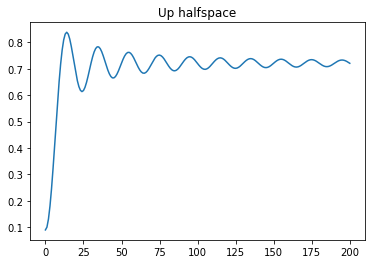

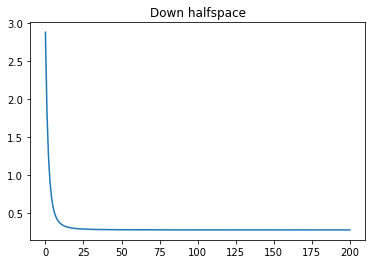

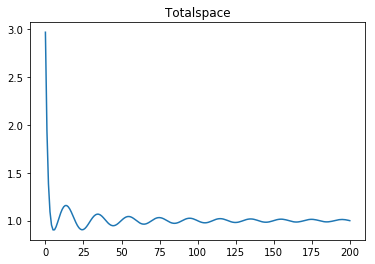

In [98]:
#eps1=1 eps2=4, mu1=mu2=1, mux=1, muy=muz=0
totalspace(1,9,1,1,1,0,0)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


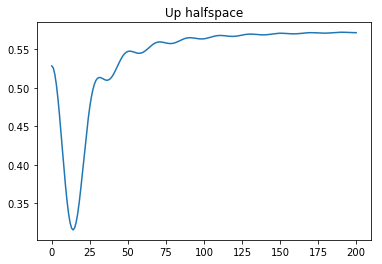

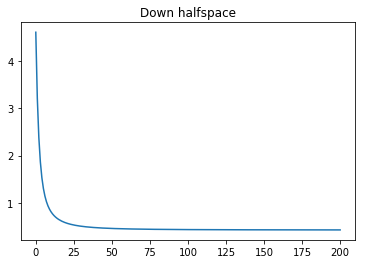

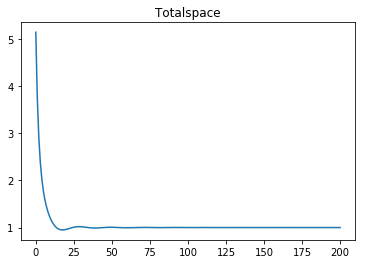

In [99]:
#eps1=1 eps2=4, mu1=mu2=1, mux=muy=0, muz=1
totalspace(1,9,1,1,0,0,1)